# YAG Fluorescence Corrections


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('classic')
import tifffile as tif
import pyFAI, fabio
import XRD_FULL_CORRECTIONS as XRD

In [38]:
CALIB_1 = tif.imread('XRD_CALIBRATION/V1_YAG-r1137_flip.tiff')

PONI_1 = pyFAI.load("XRD_CALIBRATION/V1.poni")



CALIB_2 = tif.imread('XRD_CALIBRATION/V2_YAG-r1137_flip.tiff')

PONI_2 = pyFAI.load("XRD_CALIBRATION/V2.poni")

In [39]:
VAREX1 = XRD.FullCorrections(PONI_1, CALIB_1)

VAREX2 = XRD.FullCorrections(PONI_2, CALIB_2)

In [40]:
plotting = True

## Solid Angle Corrections

In [41]:
V1_solid_angle = VAREX1.SOLID_ANGLE()

V2_solid_angle = VAREX2.SOLID_ANGLE()

<Figure size 640x480 with 0 Axes>

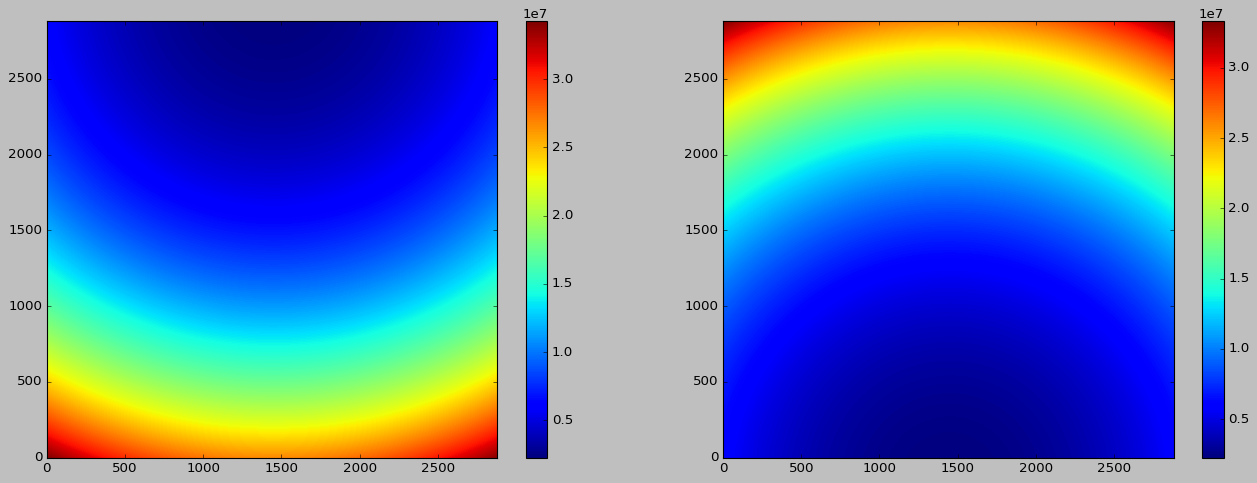

In [42]:
# Plotting the solid angle corrections
if plotting is True:
    det_size = np.arange(0,2880)

    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, (1/V1_solid_angle), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, (1/V2_solid_angle), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()

else:
    pass

## Filter Attenuation Corrections

In [43]:
Al_attenuation = 492.7 # Microns Different from one in paper. In paper: 414 micron

In [44]:
V1_filter, V1_cos_incidence = VAREX1.FILTER(400, Al_attenuation)

V2_filter, V2_cos_incidence = VAREX2.FILTER(400, Al_attenuation)

<Figure size 640x480 with 0 Axes>

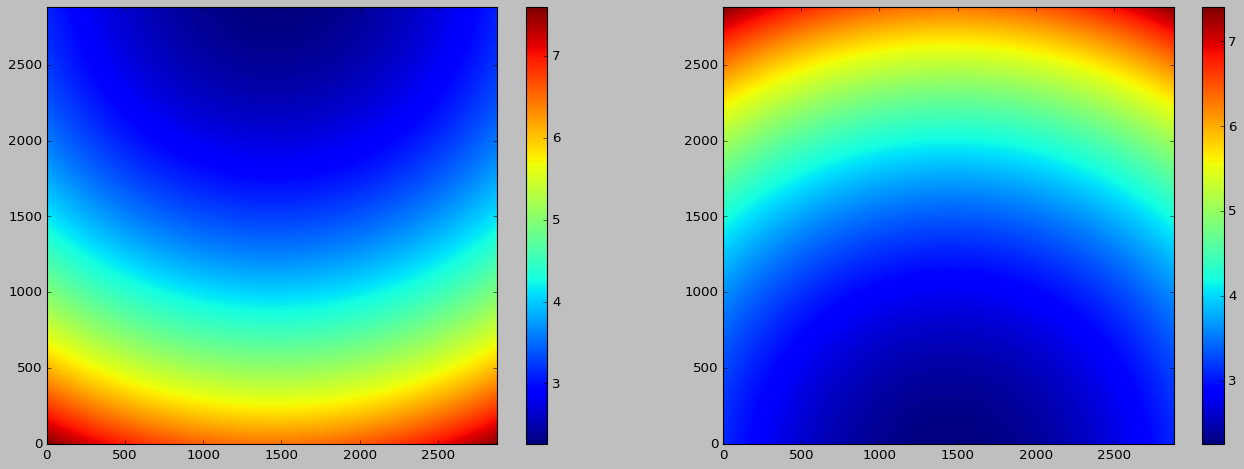

In [45]:
# Plotting the filter corrections

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, (1/V1_filter), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, (1/V2_filter), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()
    
else:
    pass

## Self Attenuation Corrections

In [46]:
attenuation_in = 53.345e-6
attenuation_out = 185.92e-6

In [47]:
VAREX1.pixel_positions()

VAREX2.pixel_positions()

(8294400,) (8294400,) (8294400,)
(8294400,) (8294400,) (8294400,)


In [48]:
V1_self_attenuation = VAREX1.SELF_ATTENUATION(attenuation_in, attenuation_out, 22.5, 20e-6)

V2_self_attenuation = VAREX2.SELF_ATTENUATION(attenuation_in, attenuation_out, 22.5, 20e-6)

/home/s/stevens/Projects/YAG_calibration_shared/XRD_FULL_CORRECTIONS.py:38: RuntimeWarning: overflow encountered in exp
  out = np.exp(-D * (cos_beta >= 0) / (cos_beta * atten_out)) * (1 - np.exp(-chi * D)) / (cos_alpha * chi)
/home/s/stevens/Projects/YAG_calibration_shared/XRD_FULL_CORRECTIONS.py:38: RuntimeWarning: invalid value encountered in multiply
  out = np.exp(-D * (cos_beta >= 0) / (cos_beta * atten_out)) * (1 - np.exp(-chi * D)) / (cos_alpha * chi)


<Figure size 640x480 with 0 Axes>

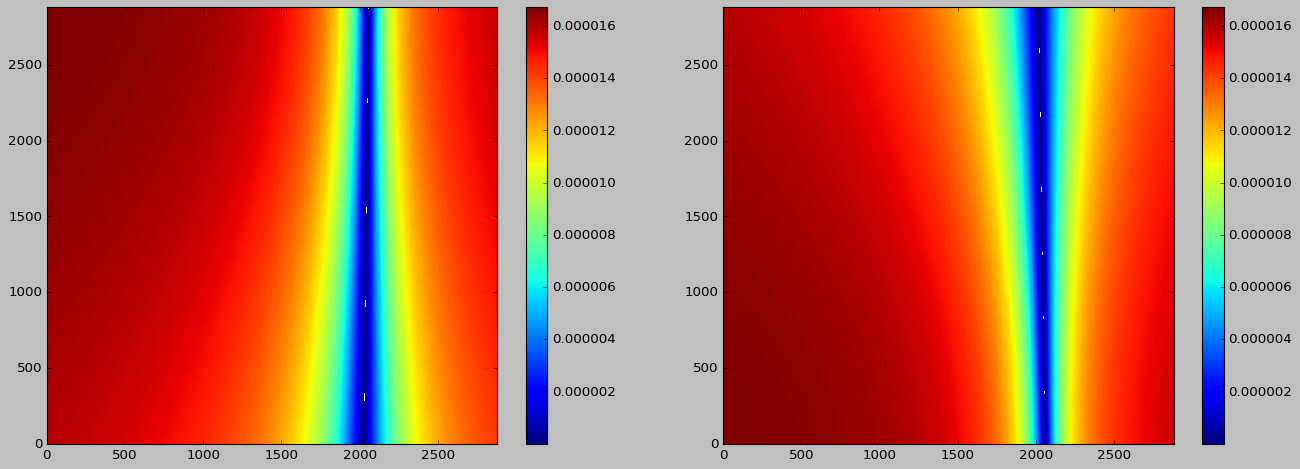

In [49]:
# Plotting the self attenuation corrections

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, V1_self_attenuation, cmap ='jet')#, vmin = 0, vmax = 1)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, V2_self_attenuation, cmap ='jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()
    
else:
    pass

## Applying the Corrections

In [50]:
V1_CALIB_corrected = CALIB_1/V1_self_attenuation/V1_solid_angle/V1_filter

V2_CALIB_corrected = CALIB_2/V2_self_attenuation/V2_solid_angle/V2_filter

/tmp/ipykernel_161466/1013709895.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x0, y0, np.log10(CALIB_1), cmap = 'jet')
/tmp/ipykernel_161466/1013709895.py:13: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x0, y0, np.log10(CALIB_1), cmap = 'jet')
/tmp/ipykernel_161466/1013709895.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x1, y1, np.log10(CALIB_2), cmap = 'jet')
/tmp/ipykernel_161466/1013709895.py:19: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x1, y1, np.log10(CALIB_2), cmap = 'jet')
/tmp/ipykernel_161466/1013709895.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x0, y0, np.log10(V1_CALIB_corrected), cmap = 'jet')
/tmp/ipykernel_161466/1013709895.py:25: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(x0, y0, np.log10(V1_CALIB_corrected), cmap = 'jet')
/tmp/ipykernel_161466/1013709895.py:31: RuntimeWarning: divide by zero encountere

<Figure size 640x480 with 0 Axes>

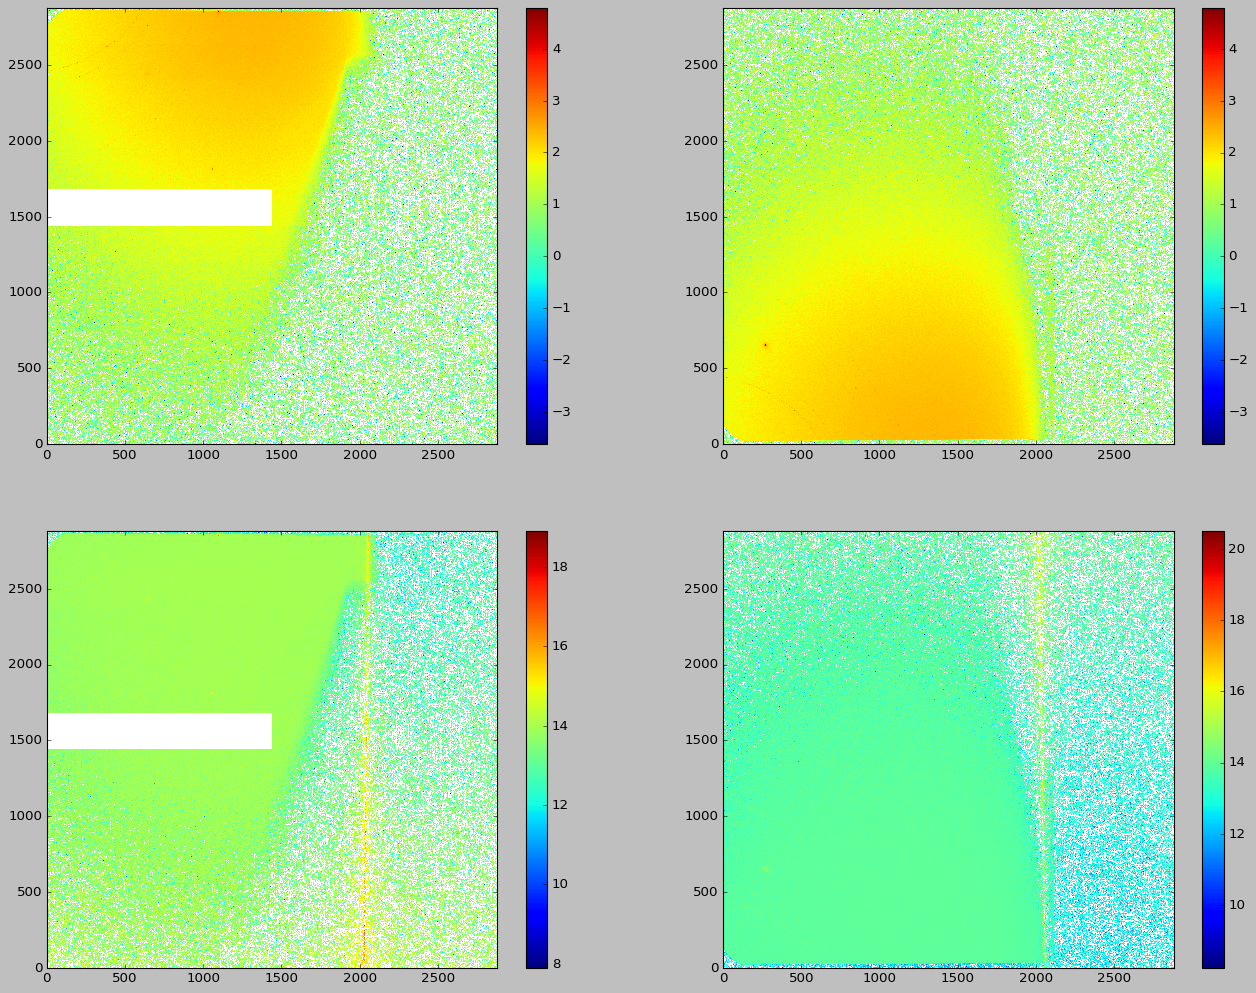

In [51]:
# Plotting the corrections

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, np.log10(CALIB_1), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, np.log10(CALIB_2), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.subplot(223)
    plt.pcolormesh(x0, y0, np.log10(V1_CALIB_corrected), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(224)
    plt.pcolormesh(x1, y1, np.log10(V2_CALIB_corrected), cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.show()
    
else:
    pass

In [52]:
# tif.imwrite('./XRD_CALIBRATION/V1_YAG-r1137_corrected.tif', V1_CALIB_corrected)
# 
# tif.imwrite('./XRD_CALIBRATION/V2_YAG-r1137_corrected.tif', V2_CALIB_corrected)

## Mask Creation

In [53]:
MASK1 = np.zeros_like(CALIB_1)

MASK2 = np.zeros_like(CALIB_2)

In [54]:
MASK1 = np.where(V1_CALIB_corrected <= 1e9, 1, MASK1)

MASK2 = np.where(V2_CALIB_corrected <= 1e9, 1, MASK2)

In [55]:
MASK1 = np.where(V1_CALIB_corrected >= 1.5e14, 1, MASK1)

MASK2 = np.where(V2_CALIB_corrected >= 1.5e14, 1, MASK2)

In [56]:
MASK1 = np.where(VAREX1.cos_beta(22.5) <= 0.1305, 1, MASK1)  # cos(82.5) = 0.1305

MASK2 = np.where(VAREX2.cos_beta(22.5) <= 0.1305, 1, MASK2)

In [57]:
MASK1 = np.where(V1_cos_incidence <= 0.55, 1, MASK1)

MASK2 = np.where(V2_cos_incidence <= 0.55, 1, MASK2)

In [58]:
V1_shadow = tif.imread('./XRD_CALIBRATION/V1_mount_shadow.tif')
MASK1 = np.where(V1_shadow == 1, 1, MASK1)

V2_shadow = tif.imread('./XRD_CALIBRATION/V2_mount_shadow.tif')
MASK2 = np.where(V2_shadow == 1, 1, MASK2)

<Figure size 640x480 with 0 Axes>

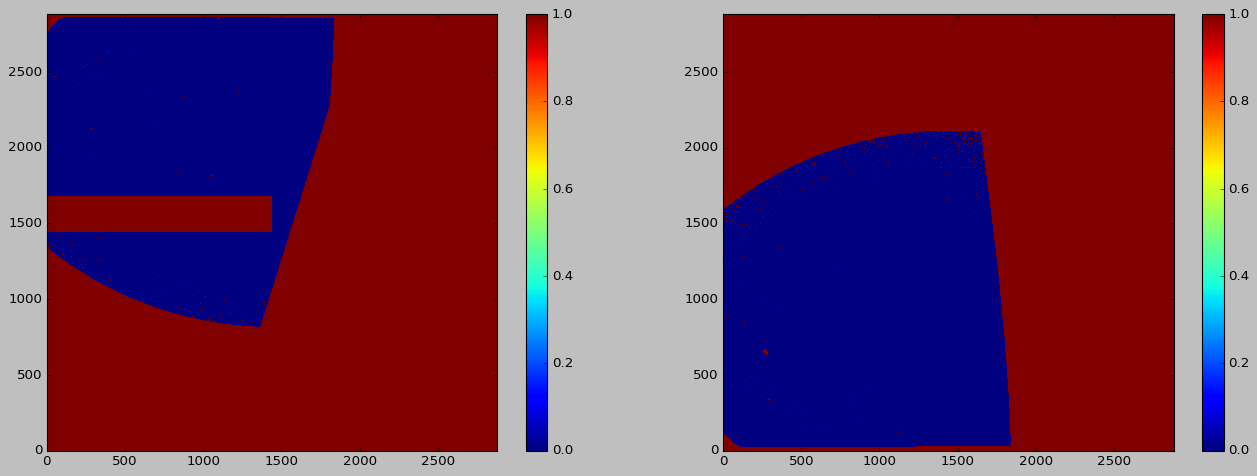

In [59]:
# Plotting the masks

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, MASK1, cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, MASK2, cmap = 'jet')
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
else:
    pass

In [60]:
# tif.imwrite('./XRD_CALIBRATION/V1_YAG_MASK.tif', MASK1)
# 
# tif.imwrite('./XRD_CALIBRATION/V2_YAG_MASK.tif', MASK2)

In [61]:
V1_median_mask = tif.imread('./XRD_CALIBRATION/V1_YAG_MASK_median.tif')
V2_median_mask = tif.imread('./XRD_CALIBRATION/V2_YAG_MASK_median.tif')

V1_median_section = np.where(V1_median_mask == 1, None, V1_CALIB_corrected)
V2_median_section = np.where(V2_median_mask == 1, None, V2_CALIB_corrected)

V1_median_section = V1_median_section[V1_median_section != np.array(None)]
V2_median_section = V2_median_section[V2_median_section != np.array(None)]

V1_median = np.median(V1_median_section)
V2_median = np.median(V2_median_section)

In [62]:
V1_CALIB_corrected_masked = np.where(MASK1 == 1, np.nan, V1_CALIB_corrected)/V1_median

V2_CALIB_corrected_masked = np.where(MASK2 == 1, np.nan, V2_CALIB_corrected)/V2_median

<Figure size 640x480 with 0 Axes>

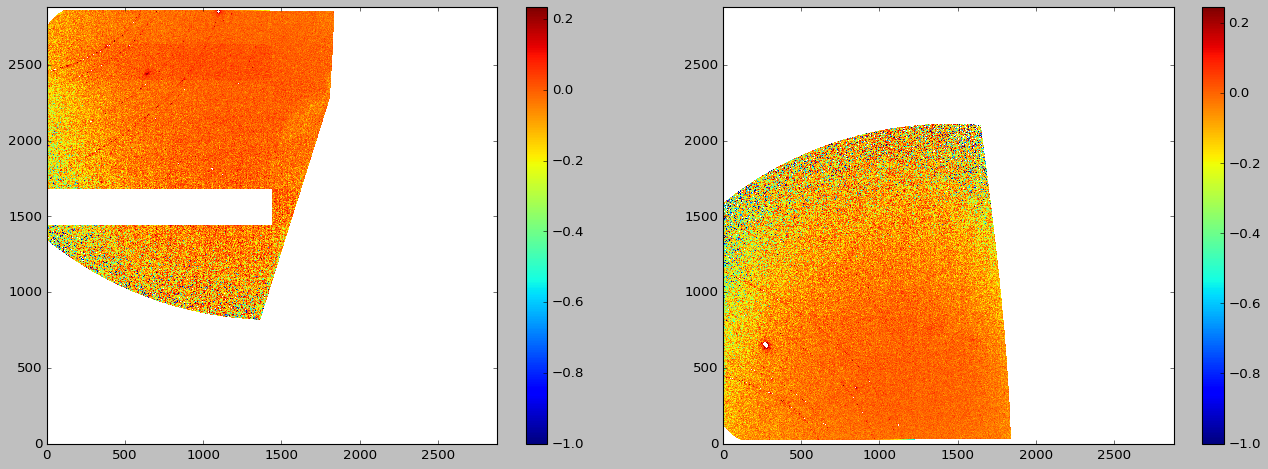

In [63]:
# Plotting the masked calibrated YAG shot

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, np.log10(V1_CALIB_corrected_masked), cmap = 'jet', vmin = -1)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, np.log10(V2_CALIB_corrected_masked), cmap = 'jet', vmin = -1)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()
else:
    pass

In [64]:
Al_attenuation_18 = 855.3

attenuation_ratio = Al_attenuation/Al_attenuation_18

In [65]:
V1_final = (V1_CALIB_corrected_masked*V1_filter)**attenuation_ratio

V2_final = (V2_CALIB_corrected_masked*V2_filter)**attenuation_ratio

<Figure size 640x480 with 0 Axes>

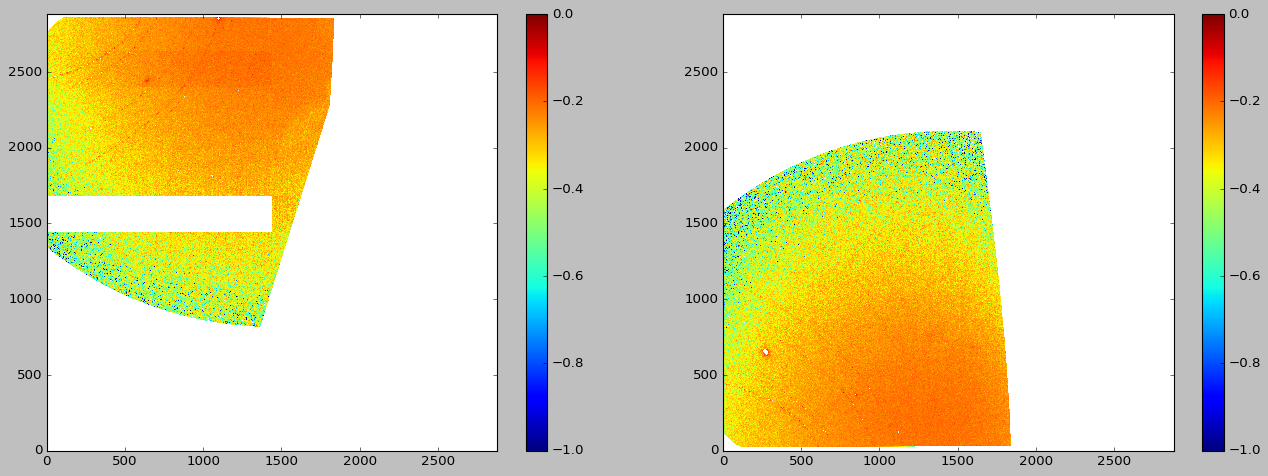

In [66]:
# Plotting my correction
plotting = True

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, np.log10(V1_final), cmap = 'jet', vmin = -1, vmax = 0)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, np.log10(V2_final), cmap = 'jet', vmin = -1, vmax = 0)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()
else:
    pass

In [67]:
V1_dave = tif.imread('./XRD_CALIBRATION/V1_Run_1137_YAG_atten_mask_0.4_8_82.5_240322_flip.tiff')

V2_dave = tif.imread('./XRD_CALIBRATION/V2_Run_1137_YAG_atten_mask_0.4_8_82.5_240322_flip.tiff')

<Figure size 640x480 with 0 Axes>

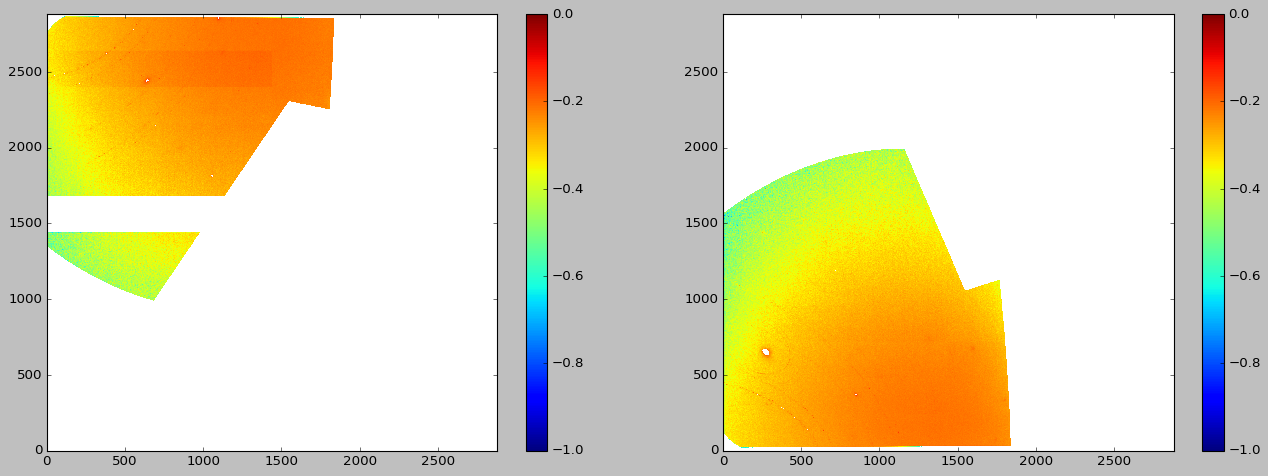

In [68]:
# Plotting Dave's correction
plotting = True

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, np.log10(V1_dave), cmap = 'jet', vmin = -1, vmax = 0)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, np.log10(V2_dave), cmap = 'jet', vmin = -1, vmax = 0)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()
else:
    pass

In [69]:
V1_test = V1_final/V1_dave

V2_test = V2_final/V2_dave

<Figure size 640x480 with 0 Axes>

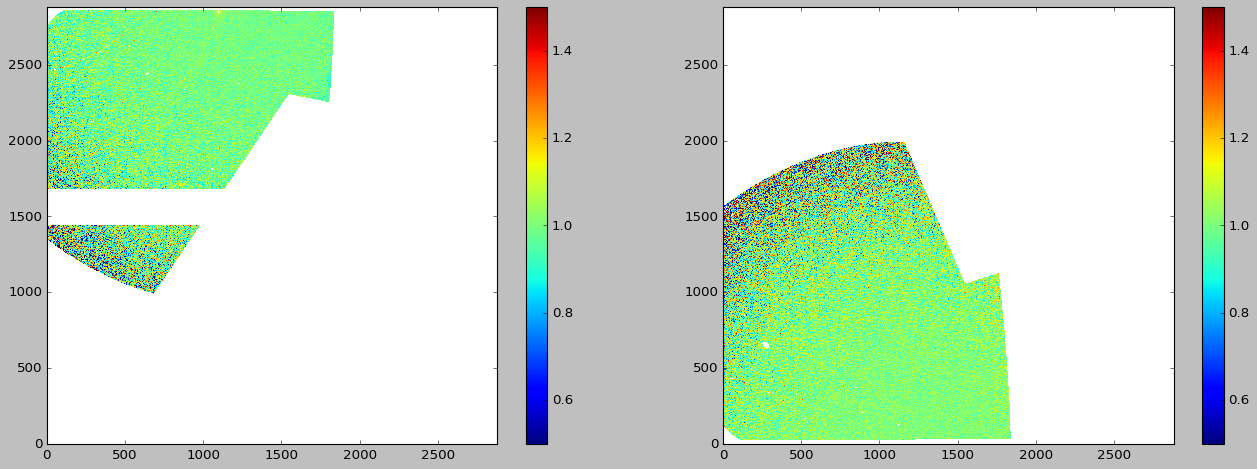

In [70]:
# Plotting the test against dave's
plotting = True

if plotting is True:
    det_size = np.arange(0,2880)
    
    x0, y0 = np.meshgrid(det_size, det_size)
    x1, y1 = np.meshgrid(det_size, det_size)
    
    plt.figure()
    plt.figure(figsize = (20, 15))
    
    plt.subplot(221)
    plt.pcolormesh(x0, y0, V1_test, cmap ='jet', vmin = 0.5, vmax = 1.5)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar()
    
    plt.subplot(222)
    plt.pcolormesh(x1, y1, V2_test, cmap ='jet', vmin = 0.5, vmax = 1.5)
    plt.xlim(0,2880)
    plt.ylim(0,2880)
    plt.colorbar() 
    
    plt.show()
else:
    pass